# DECISION TREE

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data=pd.read_csv(r'C:\D Drive\Data_Science\01 Assignments\13 Decision Tree\heart_disease.csv')

In [3]:
data

,age,sex,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,thal,num
0,63,Male,typical angina,145,233,True,lv hypertrophy,150,FALSE,2.3,downsloping,fixed defect,0
1,41,Male,atypical angina,135,203,False,normal,132,FALSE,0.0,flat,fixed defect,0
2,57,Male,asymptomatic,140,192,False,normal,148,FALSE,0.4,flat,fixed defect,0
3,52,Male,typical angina,118,186,False,lv hypertrophy,190,FALSE,0.0,flat,fixed defect,0
4,57,Male,asymptomatic,110,201,False,normal,126,TRUE,1.5,flat,fixed defect,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
903,53,Male,asymptomatic,125,0,False,normal,120,FALSE,1.5,upsloping,normal,4
904,62,Male,asymptomatic,166,170,False,st-t abnormality,120,TRUE,3.0,flat,reversable defect,4
905,56,Male,non-anginal,170,0,False,lv hypertrophy,123,TRUE,2.5,downsloping,reversable defect,4
906,56,Male,non-anginal,144,208,True,st-t abnormality,105,TURE,NaN,downsloping,reversable defect,4


### Exploratory Data Analysis

In [4]:
data.shape

(908, 13)

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 908 entries, 0 to 907
Data columns (total 13 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       908 non-null    int64  
 1   sex       908 non-null    object 
 2   cp        908 non-null    object 
 3   trestbps  908 non-null    int64  
 4   chol      908 non-null    int64  
 5   fbs       908 non-null    bool   
 6   restecg   908 non-null    object 
 7   thalch    908 non-null    int64  
 8   exang     908 non-null    object 
 9   oldpeak   846 non-null    float64
 10  slope     908 non-null    object 
 11  thal      908 non-null    object 
 12  num       908 non-null    int64  
dtypes: bool(1), float64(1), int64(5), object(6)
memory usage: 86.1+ KB


In [6]:
data['fbs'].unique()

array([ True, False])

In [7]:
## we have six numerical columns, six categorical columns and one boolean column

In [8]:
data.isnull().sum()

age          0
sex          0
cp           0
trestbps     0
chol         0
fbs          0
restecg      0
thalch       0
exang        0
oldpeak     62
slope        0
thal         0
num          0
dtype: int64

In [9]:
data['oldpeak'].unique()

array([ 2.3,  0. ,  0.4,  1.5,  1. ,  nan,  2.6,  0.5,  1.2,  3.5,  1.4,
        1.1,  0.6,  2. ,  1.6,  0.1,  0.3,  1.3,  0.2,  2.4,  1.8,  3. ,
        0.8,  1.9,  0.9,  0.7,  4.2, -0.5, -0.1, -1.1,  2.1,  3.6,  1.7,
        3.1,  2.2,  2.5,  2.8, -1.5, -0.9, -2.6, -0.8,  4. ,  5. , -1. ,
        3.4, -2. , -0.7,  3.2,  6.2,  5.6,  2.9,  3.7,  4.4,  3.8])

In [10]:
## instead of dropping rows we will fill null values with median

In [11]:
median=data['oldpeak'].median()

In [12]:
data['oldpeak']=data['oldpeak'].fillna(median)

In [13]:
data.isnull().sum()  ## null values have been replaced with median

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalch      0
exang       0
oldpeak     0
slope       0
thal        0
num         0
dtype: int64

In [14]:
data.duplicated().any()  ## there are no duplicate rows

False

In [15]:
numeric=[i for i in data.columns if data[i].dtypes!='O']

In [16]:
data[numeric].corr()

,age,trestbps,chol,fbs,thalch,oldpeak,num
age,1.000000,0.253999,-0.099967,0.176702,-0.328088,0.217942,0.326493
trestbps,0.253999,1.000000,0.117488,0.111614,-0.133360,0.134945,0.137251
chol,-0.099967,0.117488,1.000000,-0.113721,0.197907,0.032205,-0.238813
fbs,0.176702,0.111614,-0.113721,1.000000,-0.065428,0.008154,0.156268
thalch,-0.328088,-0.133360,0.197907,-0.065428,1.000000,-0.112624,-0.323058
oldpeak,0.217942,0.134945,0.032205,0.008154,-0.112624,1.000000,0.406078
num,0.326493,0.137251,-0.238813,0.156268,-0.323058,0.406078,1.000000


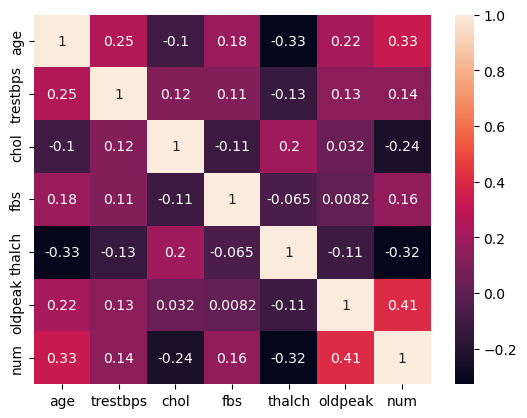

In [17]:
sns.heatmap(data[numeric].corr(),annot=True)
plt.show();

In [18]:
## column age and oldspeak has moderate positive correlation with the target column (num)

In [19]:
categoric=[i for i in data.columns if data[i].dtypes=='O']

In [20]:
categoric

['sex', 'cp', 'restecg', 'exang', 'slope', 'thal']

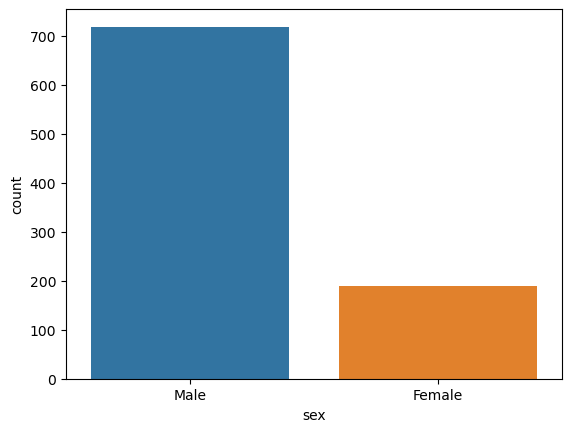

In [21]:
sns.countplot(data=data,x='sex')
plt.show();

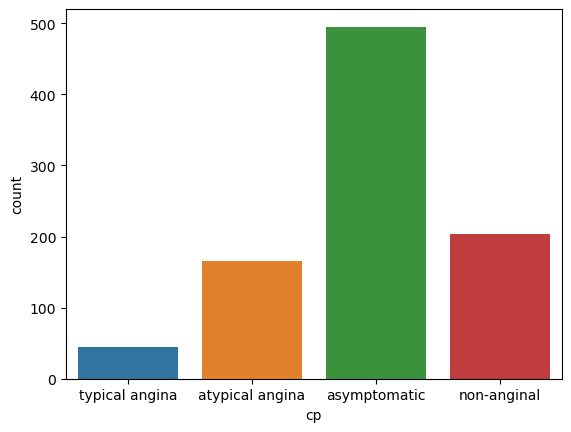

In [22]:
sns.countplot(data=data,x='cp')
plt.show();

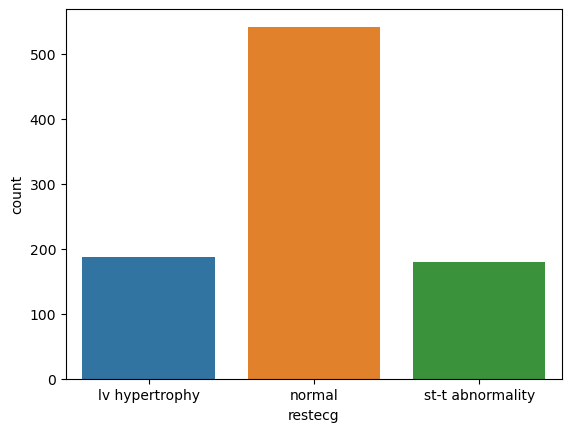

In [23]:
sns.countplot(data=data,x='restecg')
plt.show();

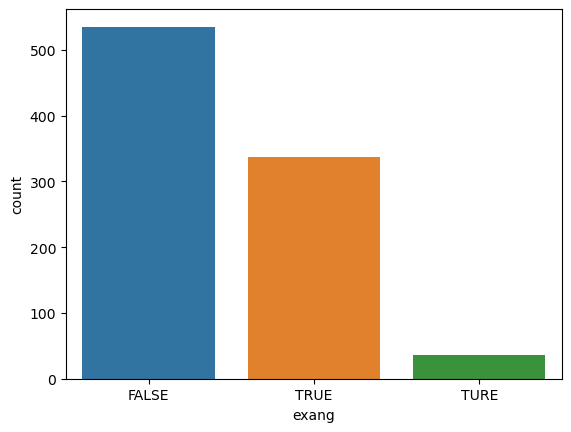

In [24]:
sns.countplot(data=data,x='exang')
plt.show();

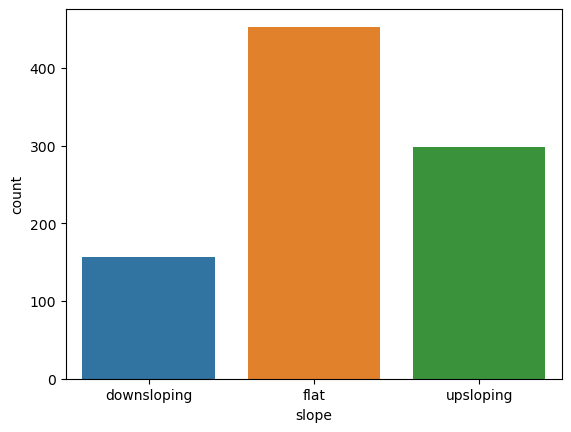

In [25]:
sns.countplot(data=data,x='slope')
plt.show();

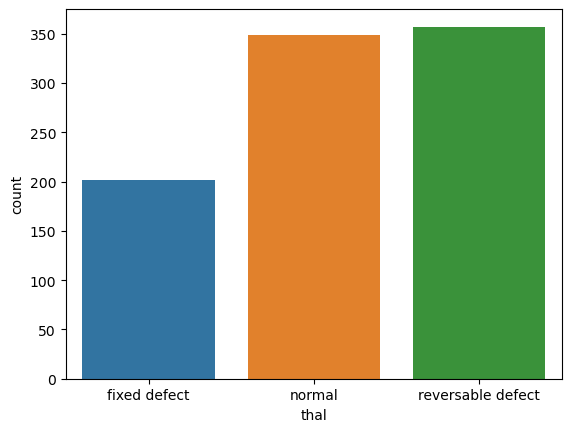

In [26]:
sns.countplot(data=data,x='thal')
plt.show();

In [27]:
## countplot indicates imbalance in the male female ratio and most important exang columns shows some values as TURE which
## certainly seems to be typing error. Since we know that this column contains True and False, we will replace TURE with TRUE

In [28]:
data['exang'].unique()

array(['FALSE', 'TRUE', 'TURE'], dtype=object)

In [29]:
data.replace(to_replace='TURE',value='TRUE',inplace=True)

In [30]:
data['exang'].unique()

array(['FALSE', 'TRUE'], dtype=object)

In [31]:
## now the incorrect value has been replaced by TRUE

In [32]:
target=data[['num']]

In [33]:
features=data.drop('num',axis=1)

In [34]:
features

,age,sex,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,thal
0,63,Male,typical angina,145,233,True,lv hypertrophy,150,FALSE,2.3,downsloping,fixed defect
1,41,Male,atypical angina,135,203,False,normal,132,FALSE,0.0,flat,fixed defect
2,57,Male,asymptomatic,140,192,False,normal,148,FALSE,0.4,flat,fixed defect
3,52,Male,typical angina,118,186,False,lv hypertrophy,190,FALSE,0.0,flat,fixed defect
4,57,Male,asymptomatic,110,201,False,normal,126,TRUE,1.5,flat,fixed defect
...,...,...,...,...,...,...,...,...,...,...,...,...
903,53,Male,asymptomatic,125,0,False,normal,120,FALSE,1.5,upsloping,normal
904,62,Male,asymptomatic,166,170,False,st-t abnormality,120,TRUE,3.0,flat,reversable defect
905,56,Male,non-anginal,170,0,False,lv hypertrophy,123,TRUE,2.5,downsloping,reversable defect
906,56,Male,non-anginal,144,208,True,st-t abnormality,105,TRUE,0.5,downsloping,reversable defect


In [35]:
num_col=[i for i in features.columns if features[i].dtypes!='O']

In [36]:
num_col

['age', 'trestbps', 'chol', 'fbs', 'thalch', 'oldpeak']

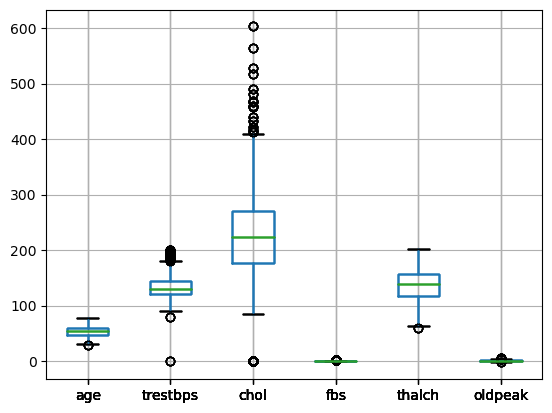

In [37]:
for i in num_col:
    features.boxplot(column=num_col)
plt.show()

In [38]:
## boxplot indicates presence of outliers

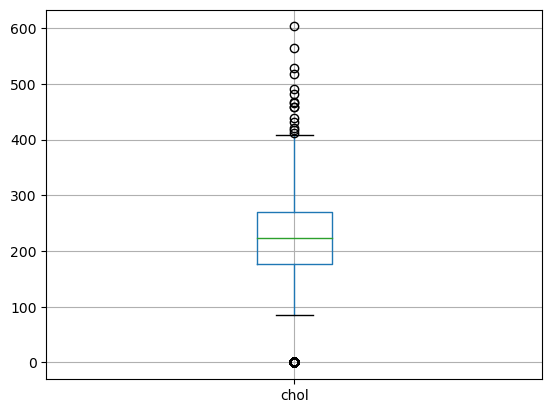

In [39]:
features.boxplot('chol')
plt.show();

In [40]:
features.describe()

,age,trestbps,chol,thalch,oldpeak
count,908.000000,908.000000,908.000000,908.000000,908.000000
mean,53.791850,133.430617,201.484581,135.957048,0.864537
std,9.158031,20.401608,112.097949,26.804929,1.060433
min,29.000000,0.000000,0.000000,60.000000,-2.600000
25%,47.750000,120.000000,176.750000,118.000000,0.000000
50%,54.000000,130.000000,224.000000,138.000000,0.500000
75%,60.000000,144.000000,270.000000,156.000000,1.500000
max,77.000000,200.000000,603.000000,202.000000,6.200000


In [41]:
## since the mean and median are nearly same for all the columns we need not remove outliers

In [42]:
features.shape

(908, 12)

In [43]:
features[num_col].corr()

,age,trestbps,chol,fbs,thalch,oldpeak
age,1.000000,0.253999,-0.099967,0.176702,-0.328088,0.217942
trestbps,0.253999,1.000000,0.117488,0.111614,-0.133360,0.134945
chol,-0.099967,0.117488,1.000000,-0.113721,0.197907,0.032205
fbs,0.176702,0.111614,-0.113721,1.000000,-0.065428,0.008154
thalch,-0.328088,-0.133360,0.197907,-0.065428,1.000000,-0.112624
oldpeak,0.217942,0.134945,0.032205,0.008154,-0.112624,1.000000


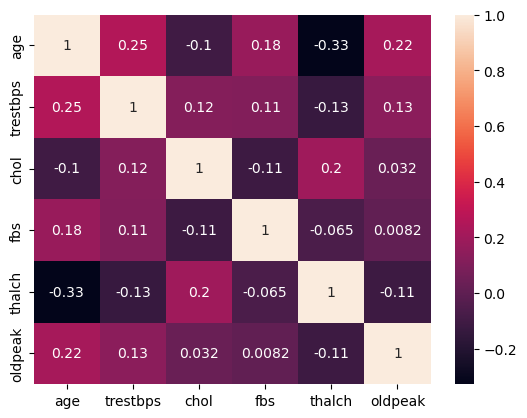

In [44]:
sns.heatmap(features[num_col].corr(),annot=True)
plt.show();

In [45]:
## We can see that the features are not highly correlated with each other

### Feature Engineering

In [46]:
from sklearn.preprocessing import LabelEncoder,StandardScaler

In [47]:
lab_enc=LabelEncoder()
std_sca=StandardScaler()

In [48]:
cat_col=[i for i in features.columns if features[i].dtypes=='O']
cat_col

['sex', 'cp', 'restecg', 'exang', 'slope', 'thal']

In [49]:
import warnings
warnings.filterwarnings('ignore')

In [50]:
features['sex']=lab_enc.fit_transform(features[['sex']])
features['cp']=lab_enc.fit_transform(features[['cp']])
features['restecg']=lab_enc.fit_transform(features[['restecg']])
features['exang']=lab_enc.fit_transform(features[['exang']])
features['slope']=lab_enc.fit_transform(features[['slope']])
features['thal']=lab_enc.fit_transform(features[['thal']])

In [51]:
features

,age,sex,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,thal
0,63,1,3,145,233,True,0,150,0,2.3,0,0
1,41,1,1,135,203,False,1,132,0,0.0,1,0
2,57,1,0,140,192,False,1,148,0,0.4,1,0
3,52,1,3,118,186,False,0,190,0,0.0,1,0
4,57,1,0,110,201,False,1,126,1,1.5,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...
903,53,1,0,125,0,False,1,120,0,1.5,2,1
904,62,1,0,166,170,False,2,120,1,3.0,1,2
905,56,1,2,170,0,False,0,123,1,2.5,0,2
906,56,1,2,144,208,True,2,105,1,0.5,0,2


In [52]:
features.fbs=features.fbs.replace({True:1,False:0})

In [53]:
features

,age,sex,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,thal
0,63,1,3,145,233,1,0,150,0,2.3,0,0
1,41,1,1,135,203,0,1,132,0,0.0,1,0
2,57,1,0,140,192,0,1,148,0,0.4,1,0
3,52,1,3,118,186,0,0,190,0,0.0,1,0
4,57,1,0,110,201,0,1,126,1,1.5,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...
903,53,1,0,125,0,0,1,120,0,1.5,2,1
904,62,1,0,166,170,0,2,120,1,3.0,1,2
905,56,1,2,170,0,0,0,123,1,2.5,0,2
906,56,1,2,144,208,1,2,105,1,0.5,0,2


In [54]:
features.columns

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalch',
       'exang', 'oldpeak', 'slope', 'thal'],
      dtype='object')

In [56]:
features1=pd.DataFrame(std_sca.fit_transform(features),columns=features.columns)

In [57]:
features1

,age,sex,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,thal
0,1.006027,0.514416,2.320276,0.567394,0.281297,1.976894,-1.561352,0.524183,-0.834983,1.354403,-1.672770,-1.528671
1,-1.397560,0.514416,0.232258,0.076967,0.013526,-0.505844,0.013879,-0.147705,-0.834983,-0.815718,-0.224843,-1.528671
2,0.350503,0.514416,-0.811752,0.322181,-0.084656,-0.505844,0.013879,0.449529,-0.834983,-0.438305,-0.224843,-1.528671
3,-0.195767,0.514416,2.320276,-0.756760,-0.138211,-0.505844,-1.561352,2.017268,-0.834983,-0.815718,-0.224843,-1.528671
4,0.350503,0.514416,-0.811752,-1.149102,-0.004325,-0.505844,0.013879,-0.371668,1.197629,0.599578,-0.224843,-1.528671
...,...,...,...,...,...,...,...,...,...,...,...,...
903,-0.086513,0.514416,-0.811752,-0.413461,-1.798388,-0.505844,0.013879,-0.595631,-0.834983,0.599578,1.223083,-0.222901
904,0.896773,0.514416,-0.811752,1.597292,-0.281021,-0.505844,1.589110,-0.595631,1.197629,2.014874,-0.224843,1.082868
905,0.241249,0.514416,1.276267,1.793463,-1.798388,-0.505844,-1.561352,-0.483649,1.197629,1.543109,-1.672770,1.082868
906,0.241249,0.514416,1.276267,0.518352,0.058155,1.976894,1.589110,-1.155538,1.197629,-0.343952,-1.672770,1.082868


In [58]:
target

,num
0,0
1,0
2,0
3,0
4,0
...,...
903,4
904,4
905,4
906,4


In [59]:
## Now we have features and target ready to pass to the algorithm

### Decision Tree Classification

In [60]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn.metrics import classification_report,accuracy_score

In [61]:
x_train,x_test,y_train,y_test=train_test_split(features1,target,train_size=0.8,random_state=100)

In [62]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(726, 12)
(182, 12)
(726, 1)
(182, 1)


In [63]:
dec_tree=DecisionTreeClassifier(criterion='gini',splitter='best',max_depth=3)

In [64]:
dec_tree.fit(x_train,y_train)

DecisionTreeClassifier(max_depth=3)

In [65]:
y_pred=dec_tree.predict(x_test)

In [66]:
accuracy_score(y_test,y_pred)

0.521978021978022

In [67]:
params={'criterion':['gini','entropy'],'splitter':['best','random'],'max_depth':[1,2,3,4,5,6]}

In [68]:
from sklearn.model_selection import GridSearchCV

In [69]:
grid_search=GridSearchCV(dec_tree,params)

In [70]:
grid_search.fit(x_train,y_train)

GridSearchCV(estimator=DecisionTreeClassifier(max_depth=3),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [1, 2, 3, 4, 5, 6],
                         'splitter': ['best', 'random']})

In [71]:
grid_search.best_params_

{'criterion': 'entropy', 'max_depth': 3, 'splitter': 'random'}

In [72]:
## grid search shows the best parameters for decision tree algorithm. We will use params.

In [73]:
dec_tree=DecisionTreeClassifier(criterion='entropy',splitter='random',max_depth=3)

In [74]:
dec_tree.fit(x_train,y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=3, splitter='random')

In [75]:
y_pred=dec_tree.predict(x_test)

In [76]:
accuracy_score(y_test,y_pred)

0.5824175824175825

In [78]:
## plotting decision tree
from sklearn.tree import plot_tree

In [82]:
plt.figure(dpi=2400)
plot_tree(dec_tree,filled=True,rounded=True);

In [83]:
## testing validation
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.67      0.89      0.77        85
           1       0.43      0.61      0.51        49
           2       0.00      0.00      0.00        21
           3       0.00      0.00      0.00        23
           4       0.00      0.00      0.00         4

    accuracy                           0.58       182
   macro avg       0.22      0.30      0.26       182
weighted avg       0.43      0.58      0.50       182



In [90]:
train_pred=dec_tree.predict(x_train)

In [91]:
## training validation
print(classification_report(y_train,train_pred))

              precision    recall  f1-score   support

           0       0.61      0.85      0.71       314
           1       0.42      0.57      0.49       216
           2       0.00      0.00      0.00        88
           3       0.00      0.00      0.00        84
           4       0.00      0.00      0.00        24

    accuracy                           0.54       726
   macro avg       0.21      0.28      0.24       726
weighted avg       0.39      0.54      0.45       726



### Interview Questions

In [92]:
## 1. What are some common hyperparameters of decision tree models, and how do they affect the model's performance?

In [93]:
## Common hyperparameters of decision tree models are
## 1. Criterion - gini and entropy are the two criterios that are used in decision tree classifier. Gini splits the node in a
## way that yields the least amount of impurity whereas entropy spilts a node in a way that it yields the most amount of 
## information gain.
## 2. max_depth - controls the maximum depth to which the decision tree is allowed to grow. When the max_depth is deeper it
## allows the tree to capture more complex patterns in the training data potentially reducing the training error.
## However, setting max_depth too high can lead to overfitting.
## 3. min_samples - defines the minimal number of samples that are needed to split a node.

In [94]:
## 2. What is the difference between the Label encoding and One-hot encoding?

In [95]:
## One Hot encoding is applied to nominal data or the data is not ordinal. This converts data into binary class (0 and 1).
## One Hot encoding can lead to high dimensionality thereby making it difficult for the model to learn.
## Label encoding is applied to ordinal data. Every category is assigned a unique integer. This sometimes causes the model
## to assume false relations as the model is biased towards data having high value.